In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read files
monday = pd.read_csv('monday.csv', sep=';', parse_dates=True, index_col=0)
tuesday = pd.read_csv('tuesday.csv', sep=';', parse_dates=True, index_col=0)
wednesday = pd.read_csv('wednesday.csv', sep=';',parse_dates=True, index_col=0)
thursday = pd.read_csv('thursday.csv', sep=';', parse_dates=True, index_col=0)
friday = pd.read_csv('friday.csv', sep=';', parse_dates=True, index_col=0)

In [3]:
monday

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
...,...,...
2019-09-02 21:49:00,1442,checkout
2019-09-02 21:49:00,1444,checkout
2019-09-02 21:49:00,1445,dairy


In [4]:
tuesday

,customer_no,location
timestamp,,
2019-09-03 07:02:00,1,fruit
2019-09-03 07:02:00,2,drinks
2019-09-03 07:03:00,3,dairy
2019-09-03 07:05:00,1,drinks
2019-09-03 07:06:00,4,dairy
...,...,...
2019-09-03 21:47:00,1421,drinks
2019-09-03 21:47:00,1422,dairy
2019-09-03 21:48:00,1421,checkout


In [5]:
monday[monday['customer_no'] == 1]

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:05:00,1,checkout


In [6]:
#add day column and create one dataframe with all data
monday['day'] = 'monday'
tuesday['day'] = 'tuesday'
wednesday['day'] = 'wednesday'
thursday['day'] = 'thursday'
friday['day'] = 'friday'



df =  pd.concat([monday, tuesday, wednesday, thursday, friday])
df.sort_values('customer_no').head()

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-05 07:02:00,1,checkout,thursday
2019-09-04 07:02:00,1,checkout,wednesday
2019-09-04 07:00:00,1,fruit,wednesday
2019-09-06 07:00:00,1,dairy,friday


In [7]:
#create customer id column for unique keys
df['customer_id']= df.day + '_' + df.customer_no.astype(str)

In [8]:
df

,customer_no,location,day,customer_id
timestamp,,,,
2019-09-02 07:03:00,1,dairy,monday,monday_1
2019-09-02 07:03:00,2,dairy,monday,monday_2
2019-09-02 07:04:00,3,dairy,monday,monday_3
2019-09-02 07:04:00,4,dairy,monday,monday_4
2019-09-02 07:04:00,5,spices,monday,monday_5
...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,friday,friday_1500
2019-09-06 21:50:00,1507,checkout,friday,friday_1507
2019-09-06 21:50:00,1508,checkout,friday,friday_1508


In [9]:
df[df.location=='checkout']

,customer_no,location,day,customer_id
timestamp,,,,
2019-09-02 07:05:00,1,checkout,monday,monday_1
2019-09-02 07:05:00,5,checkout,monday,monday_5
2019-09-02 07:06:00,2,checkout,monday,monday_2
2019-09-02 07:06:00,3,checkout,monday,monday_3
2019-09-02 07:07:00,8,checkout,monday,monday_8
...,...,...,...,...
2019-09-06 21:47:00,1502,checkout,friday,friday_1502
2019-09-06 21:48:00,1501,checkout,friday,friday_1501
2019-09-06 21:48:00,1504,checkout,friday,friday_1504


In [10]:
#tasks : - we need to consider every minute (each minute one row!)
# --> groupby('customer_no').resample('1Min').ffill()
#       - not every customer left the supermarket (dairy diaries)  
# --> checkout time = 9.59pm    
#       - we need the transition info in the table (from where to where are cust going in probabilities)
# --> transition matrix : a. shift(1) the location column to get the "from" column
#                         b. fillna('checkout') [there is one NaN in the first row]
#.                        c. pd.crosstab(df['from'], df['location'], normalize='index') 
#[split it if you want certain windows of time]

In [11]:
# Get all customers
total_customers = set(df['customer_id']) # use set-method to get a list with customers numbers
print("Total customers: ", len(total_customers))
# Display the number of customers at checkout over time
checkout_customers = set(df.loc[df['location'] == 'checkout', 'customer_id']) # use set-method to get a list with customers numbers
print("Checked out customers: ", len(checkout_customers))
# Display the number of customers that didn't checkout
no_checkout_customers = total_customers.difference(checkout_customers) # user difference-method to get a list with the customers numbers
print("Not checked out customers: ", no_checkout_customers)

Total customers:  7445
Checked out customers:  7417
Not checked out customers:  {'wednesday_1529', 'friday_1509', 'friday_1496', 'friday_1500', 'thursday_1533', 'wednesday_1527', 'tuesday_1411', 'thursday_1527', 'monday_1446', 'friday_1510', 'monday_1443', 'tuesday_1422', 'friday_1506', 'friday_1503', 'monday_1430', 'monday_1437', 'friday_1494', 'monday_1440', 'monday_1445', 'wednesday_1530', 'monday_1441', 'friday_1505', 'monday_1439', 'monday_1433', 'wednesday_1520', 'thursday_1532', 'wednesday_1528', 'monday_1447'}


In [12]:
def add_checkout(df, customer_ids):
    for c_id in customer_ids:
        date= df[df['customer_id']== c_id].index.day[0]
        #c_no = df.loc[df['customer_id']== c_id, 'customer_no'].values[0]
        day = c_id.split("_")[0]
        c_no = c_id.split("_")[1]
        df_tmp = pd.DataFrame(data=[[c_no, 'checkout', day, c_id]], index=[pd.to_datetime(f'2019-09-{date} 21:59:00')], columns=['customer_no', 'location', 'day','customer_id'])
        df_tmp.index.name = 'timestamp'
        df = pd.concat([df, df_tmp])
    return df    

In [13]:
len(df.customer_id.unique())

7445

In [14]:
df.sort_values('customer_id')

,customer_no,location,day,customer_id
timestamp,,,,
2019-09-06 07:00:00,1,dairy,friday,friday_1
2019-09-06 07:04:00,1,spices,friday,friday_1
2019-09-06 07:05:00,1,checkout,friday,friday_1
2019-09-06 07:06:00,10,fruit,friday,friday_10
2019-09-06 07:11:00,10,checkout,friday,friday_10
...,...,...,...,...
2019-09-04 16:59:00,998,checkout,wednesday,wednesday_998
2019-09-04 16:53:00,998,dairy,wednesday,wednesday_998
2019-09-04 16:57:00,998,fruit,wednesday,wednesday_998


In [15]:
df[df.location=='checkout']

,customer_no,location,day,customer_id
timestamp,,,,
2019-09-02 07:05:00,1,checkout,monday,monday_1
2019-09-02 07:05:00,5,checkout,monday,monday_5
2019-09-02 07:06:00,2,checkout,monday,monday_2
2019-09-02 07:06:00,3,checkout,monday,monday_3
2019-09-02 07:07:00,8,checkout,monday,monday_8
...,...,...,...,...
2019-09-06 21:47:00,1502,checkout,friday,friday_1502
2019-09-06 21:48:00,1501,checkout,friday,friday_1501
2019-09-06 21:48:00,1504,checkout,friday,friday_1504


In [16]:
filled_data = [] 
df_full = add_checkout(df, no_checkout_customers)
#df.index.name = 'timestamp'
df_full.tail()

,customer_no,location,day,customer_id
timestamp,,,,
2019-09-02 21:59:00,1433,checkout,monday,monday_1433
2019-09-04 21:59:00,1520,checkout,wednesday,wednesday_1520
2019-09-05 21:59:00,1532,checkout,thursday,thursday_1532
2019-09-04 21:59:00,1528,checkout,wednesday,wednesday_1528
2019-09-02 21:59:00,1447,checkout,monday,monday_1447


<AxesSubplot:xlabel='location'>

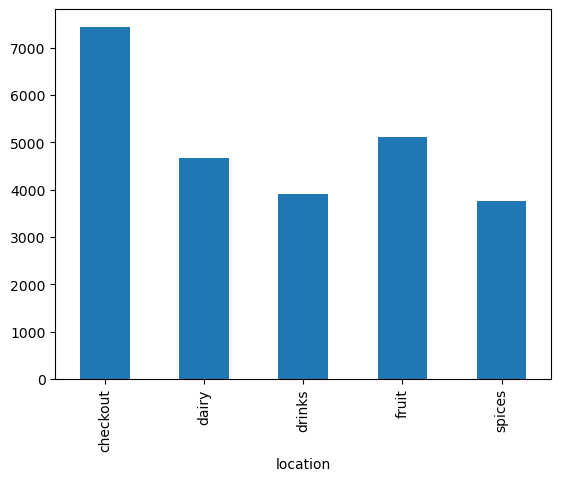

In [17]:
#Calculate the total number of customers in each section
df_full.groupby('location')['customer_id'].count().plot(kind='bar')

In [18]:
#Calculate the total number of customers in each section over time 
#(if timestamp not index:  df_full['timestamp'.dt.day , df_full['timestamp'].dt.hour])
answer = df_full.groupby(by=[df_full.index.day, df_full.index.hour, 'location'])['customer_id'].count()
answer = answer.unstack(2)
answer.index = answer.index.rename(['day','hour'])
plot_data = answer.reset_index([0,1])

<AxesSubplot:ylabel='checkout'>

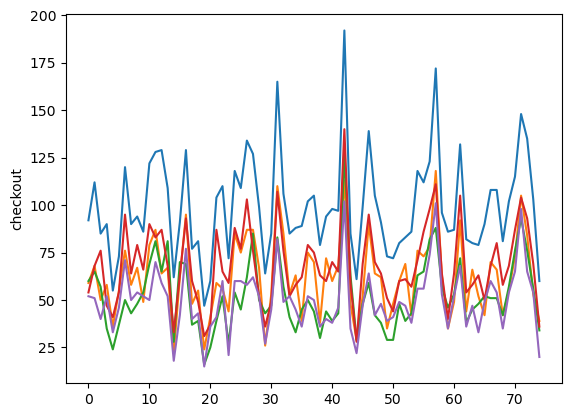

In [19]:
sns.lineplot(data=plot_data, x=plot_data.index, y='checkout')
sns.lineplot(data=plot_data, x=plot_data.index, y='dairy')
sns.lineplot(data=plot_data, x=plot_data.index, y='drinks')
sns.lineplot(data=plot_data, x=plot_data.index, y='fruit')
sns.lineplot(data=plot_data, x=plot_data.index, y='spices')

In [20]:
df_permin = df_full.groupby('customer_id').resample('1Min').ffill()
df_permin.head()

customer_no location     day customer_id
customer_id timestamp                                                   
friday_1    2019-09-06 07:00:00           1    dairy  friday    friday_1
            2019-09-06 07:01:00           1    dairy  friday    friday_1
            2019-09-06 07:02:00           1    dairy  friday    friday_1
            2019-09-06 07:03:00           1    dairy  friday    friday_1
            2019-09-06 07:04:00           1   spices  friday    friday_1

In [21]:
# IF we want to reset index
df_permin.reset_index(level='timestamp', inplace= True)
df_permin.drop('customer_no', axis=1, inplace=True)
df_permin.drop('customer_id', axis=1, inplace=True)
df_permin.drop('day', axis=1, inplace=True)
df_permin.sort_values(['timestamp'])
df_permin

,timestamp,location
customer_id,,
friday_1,2019-09-06 07:00:00,dairy
friday_1,2019-09-06 07:01:00,dairy
friday_1,2019-09-06 07:02:00,dairy
friday_1,2019-09-06 07:03:00,dairy
friday_1,2019-09-06 07:04:00,spices
...,...,...
wednesday_998,2019-09-04 16:57:00,fruit
wednesday_998,2019-09-04 16:58:00,fruit
wednesday_998,2019-09-04 16:59:00,checkout


In [22]:
#add the next location column
df_permin['next_location'] = df_permin['location'].shift(-1)

In [23]:
# take out the double checkouts
df_permin_final = df_permin[df_permin['location'] != 'checkout']
# OR df_full['from'].replace({'checkout':'entry'}, inplace = True)
df_permin_final.head(30)

,timestamp,location,next_location
customer_id,,,
friday_1,2019-09-06 07:00:00,dairy,dairy
friday_1,2019-09-06 07:01:00,dairy,dairy
friday_1,2019-09-06 07:02:00,dairy,dairy
friday_1,2019-09-06 07:03:00,dairy,spices
friday_1,2019-09-06 07:04:00,spices,checkout
friday_10,2019-09-06 07:06:00,fruit,fruit
friday_10,2019-09-06 07:07:00,fruit,fruit
friday_10,2019-09-06 07:08:00,fruit,fruit
friday_10,2019-09-06 07:09:00,fruit,fruit


In [24]:
#GET the Transition Matrix
tm = pd.crosstab(df_permin_final['location'], df_permin_final['next_location'], normalize=0)

In [25]:
tm

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.102697,0.738706,0.058134,0.049478,0.050986
drinks,0.215334,0.010880,0.599199,0.087755,0.086832
fruit,0.200564,0.095428,0.054564,0.599029,0.050415
spices,0.149613,0.191839,0.161948,0.090305,0.406294


In [26]:
tm.iloc[0].sum()

0.9999999999999999

In [27]:
df_permin

,timestamp,location,next_location
customer_id,,,
friday_1,2019-09-06 07:00:00,dairy,dairy
friday_1,2019-09-06 07:01:00,dairy,dairy
friday_1,2019-09-06 07:02:00,dairy,dairy
friday_1,2019-09-06 07:03:00,dairy,spices
friday_1,2019-09-06 07:04:00,spices,checkout
...,...,...,...
wednesday_998,2019-09-04 16:57:00,fruit,fruit
wednesday_998,2019-09-04 16:58:00,fruit,checkout
wednesday_998,2019-09-04 16:59:00,checkout,fruit


In [28]:
#Create an enter time
df_permin_final.reset_index(inplace=True) 
df_permin_final['enter_time'] = df_permin_final.groupby('customer_id')['timestamp'].transform('min')
df_permin_final['exit_time'] = df_permin_final.groupby('customer_id')['timestamp'].transform('max')
df_permin_final.head()

/var/folders/v5/ph7dhyzx7q323fzvmzrhsl9c0000gn/T/ipykernel_37559/4128645525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permin_final['enter_time'] = df_permin_final.groupby('customer_id')['timestamp'].transform('min')
/var/folders/v5/ph7dhyzx7q323fzvmzrhsl9c0000gn/T/ipykernel_37559/4128645525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permin_final['exit_time'] = df_permin_final.groupby('customer_id')['timestamp'].transform('max')


,customer_id,timestamp,location,next_location,enter_time,exit_time
0,friday_1,2019-09-06 07:00:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00
1,friday_1,2019-09-06 07:01:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00
2,friday_1,2019-09-06 07:02:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00
3,friday_1,2019-09-06 07:03:00,dairy,spices,2019-09-06 07:00:00,2019-09-06 07:04:00
4,friday_1,2019-09-06 07:04:00,spices,checkout,2019-09-06 07:00:00,2019-09-06 07:04:00


In [29]:
#Create a section order
df_permin_final['order'] = np.nan
df_permin_final.loc[df_permin_final['timestamp'] == df_permin_final['enter_time'], 'order'] = 'first'
df_permin_final.loc[df_permin_final['timestamp'] == df_permin_final['exit_time'], 'order'] = 'last'
df_permin_final.head()

/var/folders/v5/ph7dhyzx7q323fzvmzrhsl9c0000gn/T/ipykernel_37559/8520985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permin_final['order'] = np.nan
/var/folders/v5/ph7dhyzx7q323fzvmzrhsl9c0000gn/T/ipykernel_37559/8520985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permin_final.loc[df_permin_final['timestamp'] == df_permin_final['enter_time'], 'order'] = 'first'


,customer_id,timestamp,location,next_location,enter_time,exit_time,order
0,friday_1,2019-09-06 07:00:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,first
1,friday_1,2019-09-06 07:01:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,NaN
2,friday_1,2019-09-06 07:02:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,NaN
3,friday_1,2019-09-06 07:03:00,dairy,spices,2019-09-06 07:00:00,2019-09-06 07:04:00,NaN
4,friday_1,2019-09-06 07:04:00,spices,checkout,2019-09-06 07:00:00,2019-09-06 07:04:00,last


In [30]:
df_permin_final['order'].fillna('following', inplace=True)
df_permin_final.head(30)

/var/folders/v5/ph7dhyzx7q323fzvmzrhsl9c0000gn/T/ipykernel_37559/326453877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permin_final['order'].fillna('following', inplace=True)


,customer_id,timestamp,location,next_location,enter_time,exit_time,order
0,friday_1,2019-09-06 07:00:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,first
1,friday_1,2019-09-06 07:01:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,following
2,friday_1,2019-09-06 07:02:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,following
3,friday_1,2019-09-06 07:03:00,dairy,spices,2019-09-06 07:00:00,2019-09-06 07:04:00,following
4,friday_1,2019-09-06 07:04:00,spices,checkout,2019-09-06 07:00:00,2019-09-06 07:04:00,last
5,friday_10,2019-09-06 07:06:00,fruit,fruit,2019-09-06 07:06:00,2019-09-06 07:10:00,first
6,friday_10,2019-09-06 07:07:00,fruit,fruit,2019-09-06 07:06:00,2019-09-06 07:10:00,following
7,friday_10,2019-09-06 07:08:00,fruit,fruit,2019-09-06 07:06:00,2019-09-06 07:10:00,following
8,friday_10,2019-09-06 07:09:00,fruit,fruit,2019-09-06 07:06:00,2019-09-06 07:10:00,following
9,friday_10,2019-09-06 07:10:00,fruit,checkout,2019-09-06 07:06:00,2019-09-06 07:10:00,last


In [31]:
#Calculate probabilities of first section
first_section_df = df_permin_final[df_permin_final['order'] == 'first']
first_section_df.head()

,customer_id,timestamp,location,next_location,enter_time,exit_time,order
0,friday_1,2019-09-06 07:00:00,dairy,dairy,2019-09-06 07:00:00,2019-09-06 07:04:00,first
5,friday_10,2019-09-06 07:06:00,fruit,fruit,2019-09-06 07:06:00,2019-09-06 07:10:00,first
12,friday_1001,2019-09-06 17:19:00,fruit,fruit,2019-09-06 17:19:00,2019-09-06 17:28:00,first
22,friday_1002,2019-09-06 17:19:00,dairy,dairy,2019-09-06 17:19:00,2019-09-06 17:28:00,first
32,friday_1003,2019-09-06 17:19:00,dairy,dairy,2019-09-06 17:19:00,2019-09-06 17:27:00,first


In [32]:
first_sect_prob = first_section_df['location'].value_counts(normalize=True)
first_sect_prob

fruit     0.359870
dairy     0.308042
spices    0.186028
drinks    0.146060
Name: location, dtype: float64

In [33]:
tm

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.102697,0.738706,0.058134,0.049478,0.050986
drinks,0.215334,0.010880,0.599199,0.087755,0.086832
fruit,0.200564,0.095428,0.054564,0.599029,0.050415
spices,0.149613,0.191839,0.161948,0.090305,0.406294


In [34]:
#impute probs for entry in transition matrix 
tm.loc['entry'] = [0, 0.287576, 0.153526, 0.377435, 0.181464]

In [35]:
tm

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.102697,0.738706,0.058134,0.049478,0.050986
drinks,0.215334,0.010880,0.599199,0.087755,0.086832
fruit,0.200564,0.095428,0.054564,0.599029,0.050415
spices,0.149613,0.191839,0.161948,0.090305,0.406294
entry,0.000000,0.287576,0.153526,0.377435,0.181464


In [36]:
tm.to_csv('transition_matrix_full.csv')